In [1]:
!pip install folium

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import HTML
%matplotlib inline

In [3]:
data = pd.read_csv('onlinedeliverydata.csv')

In [4]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [5]:
data.dtypes

Age                                            int64
Gender                                        object
Marital Status                                object
Occupation                                    object
Monthly Income                                object
Educational Qualifications                    object
Family size                                    int64
latitude                                     float64
longitude                                    float64
Pin code                                       int64
Medium (P1)                                   object
Medium (P2)                                   object
Meal(P1)                                      object
Meal(P2)                                      object
Perference(P1)                                object
Perference(P2)                                object
Ease and convenient                           object
Time saving                                   object
More restaurant choices                       

In [6]:
data.isnull()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
386,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
383     True
384     True
385     True
386     True
387     True
Length: 388, dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [9]:
%matplotlib inline

x = data.groupby(['latitude', 'longitude', 'Pin code']).size().reset_index()
x.columns = ['latitude', 'longitude', 'pincode', 'frequency']
x.sort_values(by=['frequency'], ascending=False, inplace=True)

latitude = 12.972442
longitude = 77.580643
delivery_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lon, freq, pin in zip(x['latitude'], x['longitude'], x['frequency'], x['pincode']):
    folium.CircleMarker([lat, lon], radius=freq, 
                        popup = ('Pincode: ' + str(pin) + '<br>' 
                                 '# of customers: ' + str(freq)
                                ), 
                        tooltip='Click to expand',
                        color='b', 
                        fill_color='red', 
                        fill=True, 
                        fill_opacity=0.6).add_to(delivery_map)

In [10]:
delivery_map

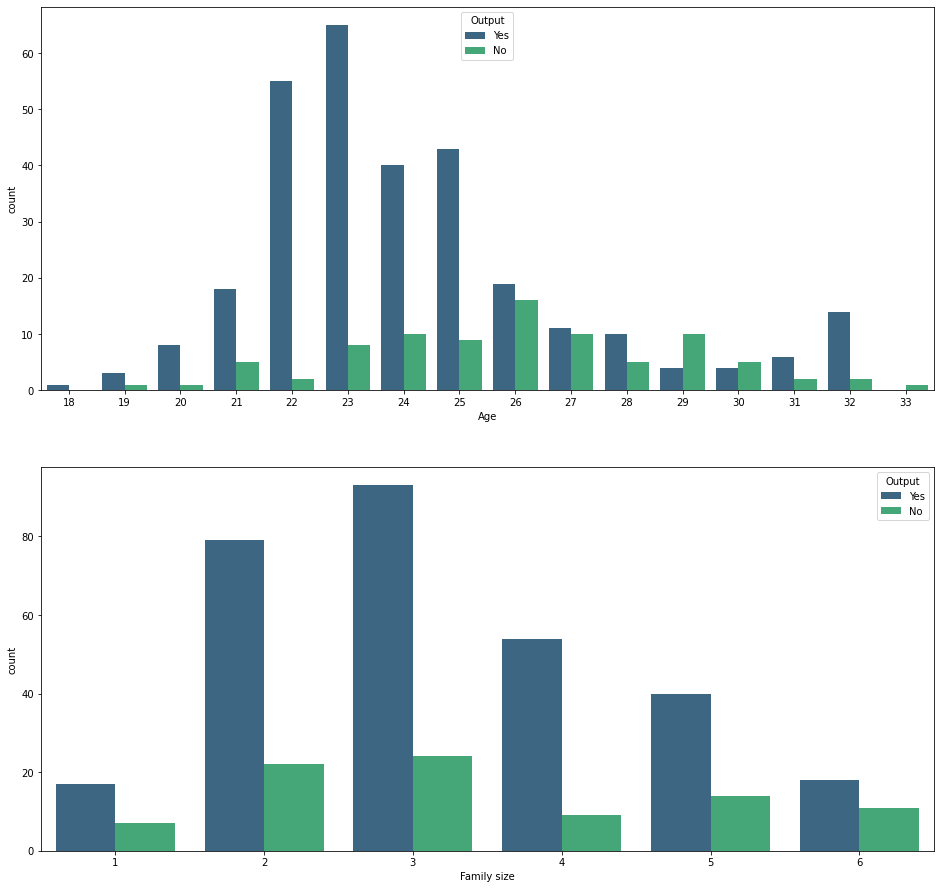

In [11]:
%matplotlib inline

_ = [0, 6]
_ = list(enumerate([list(data.columns)[i] for i in _], start=1))

fig = plt.figure(figsize=[16,24])
for index, col_name in _:
    ax = fig.add_subplot(3, 1, index) 
    sns.countplot(x=col_name, data=data, hue='Output', palette='viridis')